In [ ]:
!pip install pickle5
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 27.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 25.1 MB/s 


In [3]:
import os
import zipfile 
import random
# import pickle5 as pickle
import pickle
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_file_name = '/content/drive/Othercomputers/My Computer/Computer vision/projects/dl and cnns/classification handwritten digits gisettedataset/archive.zip'
# data_file_name = './archive.zip'
dir = './dataset'
zip_ref = zipfile.ZipFile(data_file_name, 'r')
zip_ref.extractall(dir)
zip_ref.close()

In [4]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo)
    return dict

gisette_data = unpickle("./dataset/gisette.pickle")

In [5]:
train_data = gisette_data['training']['data']
train_labels = gisette_data['training']['labels'] # label 1 for digit 4,   label -1 for digit 9
print(type(train_labels), train_labels)

validation_data = gisette_data['validation']['data']
validation_labels = gisette_data['validation']['labels']

test_data = gisette_data['testing']['data']

train_labels = np.array([int(x) if x > 0 else 0 for x in train_labels])
print(type(train_labels), train_labels)
validation_labels = np.array([int(x)  if x > 0 else 0 for x in validation_labels])

<class 'numpy.ndarray'> [ 1. -1.  1. ... -1. -1. -1.]
<class 'numpy.ndarray'> [1 0 1 ... 0 0 0]


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
X_train = scaler.transform(train_data)
X_valid = scaler.transform(validation_data)
X_test = scaler.transform(test_data)

In [7]:
model = Sequential()
model.add(Dense(500, input_dim=5000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               2500500   
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 2,600,901
Trainable params: 2,600,901
Non-

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, train_labels, verbose=1, epochs=100, batch_size=64, validation_data=(X_valid, validation_labels))

Epoch 1/100
94/94 [==============================] - 3s 23ms/step - loss: 0.1608 - accuracy: 0.9343 - val_loss: 0.1010 - val_accuracy: 0.9740
Epoch 2/100
94/94 [==============================] - 2s 22ms/step - loss: 0.0307 - accuracy: 0.9898 - val_loss: 0.1348 - val_accuracy: 0.9670
Epoch 3/100
94/94 [==============================] - 2s 23ms/step - loss: 0.0100 - accuracy: 0.9965 - val_loss: 0.2711 - val_accuracy: 0.9450
Epoch 4/100
94/94 [==============================] - 2s 23ms/step - loss: 0.0078 - accuracy: 0.9980 - val_loss: 0.1447 - val_accuracy: 0.9700
Epoch 5/100
94/94 [==============================] - 2s 24ms/step - loss: 0.0084 - accuracy: 0.9975 - val_loss: 0.1469 - val_accuracy: 0.9690
Epoch 6/100
94/94 [==============================] - 2s 23ms/step - loss: 0.0153 - accuracy: 0.9953 - val_loss: 0.1308 - val_accuracy: 0.9770
Epoch 7/100
94/94 [==============================] - 2s 23ms/step - loss: 0.0065 - accuracy: 0.9982 - val_loss: 0.1458 - val_accuracy: 0.9730
Epoch 

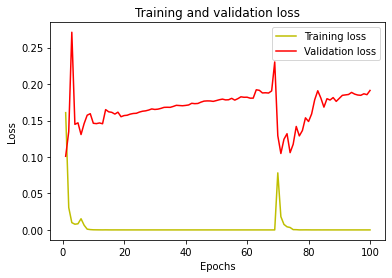

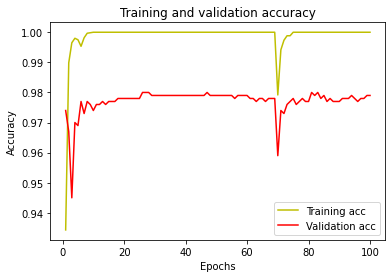

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

32/32 [==============================] - 0s 5ms/step


<AxesSubplot:>

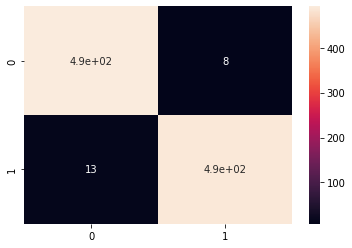

In [11]:
y_pred = model.predict(X_valid)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(validation_labels, y_pred)

sns.heatmap(cm, annot=True)

In [ ]:
import shap
shap_values = shap.DeepExplainer(model, X_train).shap_values(X_test)
shap.summary_plot(shap_values, X_train, plot_type='bar')

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2500)
X_train = pca.fit_transform(X_train)
X_valid = pca.transform(X_valid)

In [15]:
model = Sequential()
model.add(Dense(500, input_dim=2500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, train_labels, verbose=1, epochs=20, batch_size=64, validation_data=(X_valid, validation_labels))

Epoch 1/20
94/94 [==============================] - 2s 14ms/step - loss: 0.1844 - accuracy: 0.9255 - val_loss: 0.0879 - val_accuracy: 0.9710
Epoch 2/20
94/94 [==============================] - 1s 14ms/step - loss: 0.0095 - accuracy: 0.9982 - val_loss: 0.0886 - val_accuracy: 0.9710
Epoch 3/20
94/94 [==============================] - 1s 15ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0888 - val_accuracy: 0.9750
Epoch 4/20
94/94 [==============================] - 1s 13ms/step - loss: 3.7958e-04 - accuracy: 1.0000 - val_loss: 0.0915 - val_accuracy: 0.9750
Epoch 5/20
94/94 [==============================] - 1s 14ms/step - loss: 2.3737e-04 - accuracy: 1.0000 - val_loss: 0.0935 - val_accuracy: 0.9760
Epoch 6/20
94/94 [==============================] - 1s 15ms/step - loss: 1.6081e-04 - accuracy: 1.0000 - val_loss: 0.0963 - val_accuracy: 0.9760
Epoch 7/20
94/94 [==============================] - 1s 14ms/step - loss: 1.1098e-04 - accuracy: 1.0000 - val_loss: 0.0977 - val_accuracy: 0.97

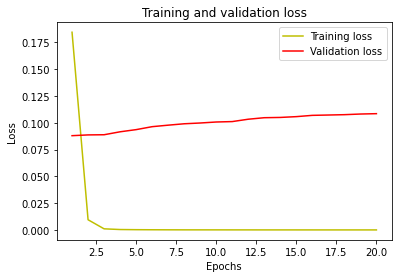

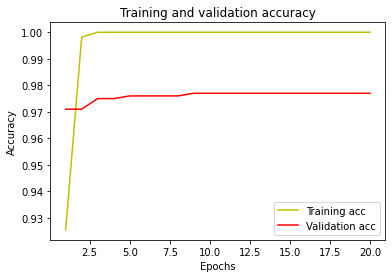

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

32/32 [==============================] - 0s 3ms/step


<AxesSubplot:>

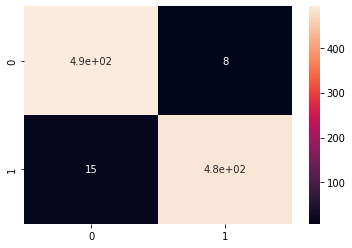

In [17]:
y_pred = model.predict(X_valid)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(validation_labels, y_pred)

sns.heatmap(cm, annot=True)